# Лабораторная 1

In [1]:
from keras.models import load_model  # Для загрузки обученной модели Keras (нужен TensorFlow)
from PIL import Image, ImageOps     # Работа с изображениями (устанавливается как pillow, а не `PIL`)
import numpy as np # Работа с массивами и числами
import matplotlib.pyplot as plt

D:\gadd\envs\Brp2\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Отключаем научную нотацию (например, чтобы числа не писались как 1.23e-05)
np.set_printoptions(suppress=True)

In [3]:
# Загружаем предварительно обученную модель из файла
model = load_model("keras_model.h5", compile=False)

In [4]:
# Загружаем названия классов (например: "cat", "dog", и т.д.)
with open("labels.txt", "r", encoding="utf-8") as f:
    class_names = f.readlines()

In [5]:
# Создаём массив нужной формы для подачи изображения в модель
# Здесь (1, 224, 224, 3) — одна картинка размером 224x224 пикселя и 3 цветовых канала (RGB)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [6]:
# Открываем изображение и конвертируем его в RGB
image = Image.open(r"C:\Users\ПК\cat.jpg").convert("RGB")
# Меняем размер изображения до 224x224 пикселей с обрезкой по центру
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
# Преобразуем изображение в массив numpy
image_array = np.asarray(image)
# Нормализуем изображение: приводим значения пикселей в диапазон от -1 до 1
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
# Загружаем нормализованное изображение в массив для предсказания
data[0] = normalized_image_array

In [7]:
# Выполняем предсказание модели
prediction = model.predict(data)

1/1 [==============================] - 2s 2s/step


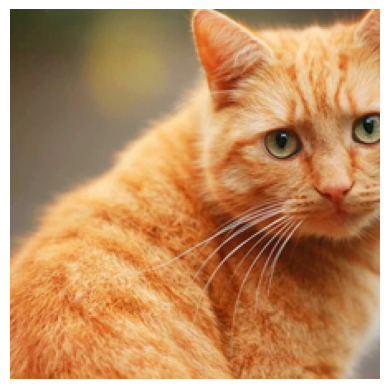

Класс: Кот
Уверенность: 1.0


In [8]:
plt.imshow(image)
plt.axis('off')
plt.show()
# Находим индекс с наибольшим значением (наиболее вероятный класс)
index = np.argmax(prediction)
# Получаем название класса по индексу
class_name = class_names[index]
# Получаем уверенность (вероятность) модели в этом предсказании
confidence_score = prediction[0][index]
# Печатаем результат: класс и уверенность
print("Класс:", class_name[2:], end="")  # [2:] чтобы убрать первые символы (например, номера или табуляции)
print("Уверенность:", confidence_score)

In [9]:
# Открываем изображение и конвертируем его в RGB
image1 = Image.open(r"C:\Users\ПК\пес.jpg").convert("RGB")
# Меняем размер изображения до 224x224 пикселей с обрезкой по центру
size = (224, 224)
image1 = ImageOps.fit(image1, size, Image.Resampling.LANCZOS)
# Преобразуем изображение в массив numpy
image_array = np.asarray(image1)
# Нормализуем изображение: приводим значения пикселей в диапазон от -1 до 1
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
# Загружаем нормализованное изображение в массив для предсказания
data[0] = normalized_image_array
# Выполняем предсказание модели
prediction = model.predict(data)

1/1 [==============================] - 0s 82ms/step


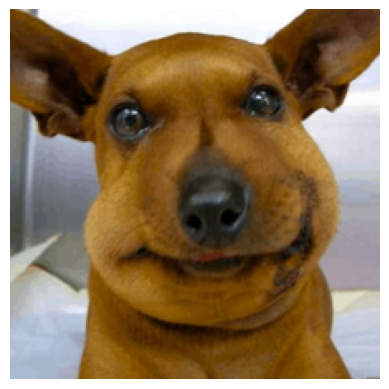

Класс: Собака
Уверенность: 1.0


In [10]:
plt.imshow(image1)
plt.axis('off')
plt.show()
# Находим индекс с наибольшим значением (наиболее вероятный класс)
index = np.argmax(prediction)
# Получаем название класса по индексу
class_name = class_names[index]
# Получаем уверенность (вероятность) модели в этом предсказании
confidence_score = prediction[0][index]
# Печатаем результат: класс и уверенность
print("Класс:", class_name[2:], end="")  # [2:] чтобы убрать первые символы (например, номера или табуляции)
print("Уверенность:", confidence_score)